In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from  scipy import stats
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Calculate probability for 15 or more hurricanes

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

Mean values of pre and post exposition at halogen lamps 
 Pre =  116.7 
 Post = 135.4

Total sigma 11.04158805003459

The T student is: 3.786997938137629
p-value = 1.9956975358671354


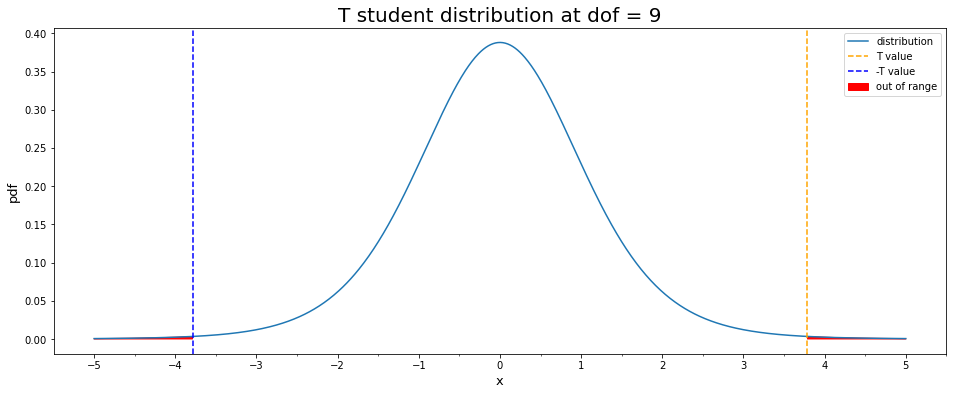

In [22]:
#array of data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
tot = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135,120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
num = len(pre)

#statistic values of data
pre_mean = np.mean(pre)
post_mean = np.mean(post)
pre_s = np.sqrt(np.var(pre, ddof=1)) #non troppo sicura che ddof sia 1
post_s = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((pre_s**2+post_s**2)/2)

print('Mean values of pre and post exposition at halogen lamps \n Pre = ', pre_mean, '\n Post =', post_mean)
print('\nTotal sigma', sigma)

#Definition of T-Student function
def TStudent (n, x1, x2, s):
    return abs(x1-x2)/(s*np.sqrt(2/n))

#Calculation of T-Student 
T = TStudent(num, pre_mean, post_mean, sigma)
print('\nThe T student is:', T)

#Printing T-Student distribution
fig, ax = plt.subplots(figsize=(16,6))
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, num - 1)
ax.plot(xs, ts, label = 'distribution')
ax.fill_between(xs, ts, where=np.abs(xs) > T, color='red', label = 'out of range')
ax.axvline(T, linestyle='--', color='orange', label = 'T value')
ax.axvline(-T, linestyle='--', color='blue', label = '-T value')
ax.set_title('T student distribution at dof = 9', size = 20)
ax.set_ylabel("pdf", size =13)
ax.set_xlabel("x", size = 13)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.legend(loc = 'upper right')


# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, num - 1) + (1. - stats.t.cdf(-T, num - 1))
print("p-value =", pvalue)

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [30]:
#downloading the file (only once then I can comment this line to avoid downloading the file several times)
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P /

#opening the txt file with data
data = pd.read_csv('populations.txt', sep=" ")
data.columns = ["year", "hare","lynx", "carrot"]


ValueError: Length mismatch: Expected axis has 2 elements, new values have 4 elements

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise. OK
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale: OK
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

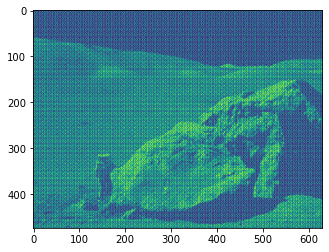

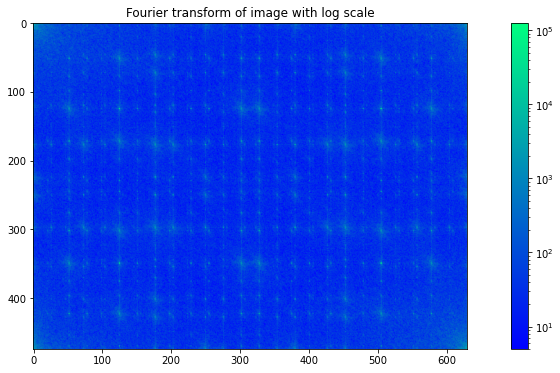

In [28]:
from scipy.fftpack import fft2, ifft2
from matplotlib.colors import LogNorm

#importing the image as np array
image = plt.imread('moonlanding.png')
#plotting the image
plt.imshow(image)

#Performing 2D Fourier transform with fft2 from scipy.fftpack
F_transf = fft2(image)

#Plotting Fourier transform
fig, ax = plt.subplots(figsize=(16,6))
im = plt.imshow(abs(F_transf), norm=LogNorm(vmin=5), cmap='winter')
plt.colorbar(im)
plt.title("Fourier transform of image with log scale")
plt.show()

#centering zero-frequency component in centre of spectrum
F_transf2 = F_transf.copy()
img_shift = np.fft.fftshift(image)

